# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
from pprint import pprint

# Import API key
weather_api_key = "6623300f360e071250693d4b35100f00"

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data_cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(len(cities))

612


In [3]:
print(cities[0])

ushuaia


In [4]:
url = "https://api.openweathermap.org/data/2.5/weather?id=524901"
unit = "imperial"
query_url = f"{url}&appid={weather_api_key}&units={unit}&q={cities[0]}"
response = requests.get(query_url).json()
pprint(response["main"]["humidity"])

61


### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).

https://api.openweathermap.org/data/2.5/weather?lat={lat}&lon={lon}&appid={API key}

In [11]:
#create url for query with imperial units and city at the end
#url from https://openweathermap.org/appid

url = "https://api.openweathermap.org/data/2.5/weather?id=524901"
unit = "imperial"
query_url = f"{url}&appid={weather_api_key}&units={unit}&q="


# Lists for results
lat = []
lng = []
result_cities = []
temperature_F = []
humidity = []
cloudiness = []
wind_speed = []
date = []
country = []

for city in cities:

    try:
        print("Processing Record " + str(city) + ":" )
        #print(query_url + city.replace(" ","+"))
        response = requests.get(query_url + city.replace(" ","+")).json()
        lat.append(response["coord"]["lat"])
        lng.append(response["coord"]["lon"])
        temperature_F.append(response["main"]["temp_max"])
        humidity.append(response["main"]["humidity"])
        cloudiness.append(response["clouds"]["all"])
        wind_speed.append(response["wind"]["speed"])
        date.append(response["dt"])
        country.append(response["sys"]["country"])
        result_cities.append(city)
        pprint(f"City processed: {city}")
    except:
        pprint(f"City NOT found: {city}")
        

Processing Record ushuaia:
'City processed: ushuaia'
Processing Record urumqi:
'City processed: urumqi'
Processing Record rikitea:
'City processed: rikitea'
Processing Record carutapera:
'City processed: carutapera'
Processing Record port moresby:
'City processed: port moresby'
Processing Record mataura:
'City processed: mataura'
Processing Record sisimiut:
'City processed: sisimiut'
Processing Record oussouye:
'City processed: oussouye'
Processing Record mahebourg:
'City processed: mahebourg'
Processing Record port elizabeth:
'City processed: port elizabeth'
Processing Record nizhneyansk:
'City NOT found: nizhneyansk'
Processing Record cape town:
'City processed: cape town'
Processing Record barrow:
'City processed: barrow'
Processing Record lasa:
'City processed: lasa'
Processing Record new norfolk:
'City processed: new norfolk'
Processing Record hay river:
'City processed: hay river'
Processing Record avarua:
'City processed: avarua'
Processing Record palmer:
'City processed: palmer

'City NOT found: samalaeulu'
Processing Record honiara:
'City processed: honiara'
Processing Record poli:
'City processed: poli'
Processing Record saskylakh:
'City processed: saskylakh'
Processing Record bambous virieux:
'City processed: bambous virieux'
Processing Record pevek:
'City processed: pevek'
Processing Record zhigansk:
'City processed: zhigansk'
Processing Record morales:
'City processed: morales'
Processing Record inderborskiy:
'City NOT found: inderborskiy'
Processing Record port alfred:
'City processed: port alfred'
Processing Record alta floresta:
'City processed: alta floresta'
Processing Record virginia beach:
'City processed: virginia beach'
Processing Record half moon bay:
'City processed: half moon bay'
Processing Record nanortalik:
'City processed: nanortalik'
Processing Record traverse city:
'City processed: traverse city'
Processing Record takoradi:
'City processed: takoradi'
Processing Record oksfjord:
'City processed: oksfjord'
Processing Record klaksvik:
'City

'City processed: huinan'
Processing Record korem:
'City processed: korem'
Processing Record meulaboh:
'City processed: meulaboh'
Processing Record westport:
'City processed: westport'
Processing Record karkaralinsk:
'City NOT found: karkaralinsk'
Processing Record nishihara:
'City processed: nishihara'
Processing Record beyneu:
'City processed: beyneu'
Processing Record nome:
'City processed: nome'
Processing Record sinnamary:
'City processed: sinnamary'
Processing Record ballina:
'City processed: ballina'
Processing Record warmbad:
'City processed: warmbad'
Processing Record luderitz:
'City processed: luderitz'
Processing Record mareeba:
'City processed: mareeba'
Processing Record vibo valentia:
'City processed: vibo valentia'
Processing Record sao joao da barra:
'City processed: sao joao da barra'
Processing Record coolum beach:
'City processed: coolum beach'
Processing Record ribas do rio pardo:
'City processed: ribas do rio pardo'
Processing Record goderich:
'City processed: goderi

'City processed: vao'
Processing Record esso:
'City processed: esso'
Processing Record beloha:
'City processed: beloha'
Processing Record rumford:
'City processed: rumford'
Processing Record cockburn town:
'City processed: cockburn town'
Processing Record alghero:
'City processed: alghero'
Processing Record kavaratti:
'City processed: kavaratti'
Processing Record kang:
'City processed: kang'
Processing Record evensk:
'City processed: evensk'
Processing Record high level:
'City processed: high level'
Processing Record inhambane:
'City processed: inhambane'
Processing Record dwarka:
'City processed: dwarka'
Processing Record ouesso:
'City processed: ouesso'
Processing Record ginir:
'City processed: ginir'
Processing Record calvinia:
'City processed: calvinia'
Processing Record port keats:
'City processed: port keats'
Processing Record sola:
'City processed: sola'
Processing Record nouadhibou:
'City processed: nouadhibou'
Processing Record charters towers:
'City processed: charters towers

'City processed: alekseyevsk'
Processing Record taltal:
'City processed: taltal'
Processing Record visnes:
'City processed: visnes'
Processing Record alyangula:
'City processed: alyangula'
Processing Record sembe:
'City processed: sembe'
Processing Record vaitupu:
'City NOT found: vaitupu'
Processing Record san quintin:
'City processed: san quintin'
Processing Record zabid:
'City processed: zabid'
Processing Record ipora:
'City processed: ipora'
Processing Record vestmanna:
'City processed: vestmanna'
Processing Record griffith:
'City processed: griffith'
Processing Record mount gambier:
'City processed: mount gambier'
Processing Record dergachi:
'City processed: dergachi'
Processing Record rancho palos verdes:
'City processed: rancho palos verdes'
Processing Record umm lajj:
'City processed: umm lajj'
Processing Record kudahuvadhoo:
'City processed: kudahuvadhoo'
Processing Record arman:
'City processed: arman'
Processing Record jumla:
'City processed: jumla'
Processing Record kashkha

In [15]:
pprint(humidity)

[61,
 33,
 88,
 91,
 83,
 75,
 89,
 66,
 69,
 81,
 69,
 92,
 97,
 78,
 38,
 69,
 29,
 72,
 78,
 81,
 95,
 84,
 87,
 67,
 74,
 89,
 82,
 78,
 52,
 71,
 61,
 74,
 96,
 26,
 67,
 79,
 97,
 98,
 37,
 93,
 80,
 81,
 80,
 71,
 75,
 62,
 96,
 92,
 77,
 24,
 61,
 83,
 79,
 87,
 91,
 65,
 89,
 84,
 81,
 70,
 93,
 70,
 81,
 56,
 65,
 23,
 88,
 41,
 90,
 86,
 78,
 61,
 70,
 67,
 91,
 69,
 42,
 58,
 76,
 94,
 73,
 74,
 67,
 83,
 83,
 33,
 91,
 96,
 86,
 57,
 87,
 78,
 19,
 89,
 94,
 70,
 96,
 61,
 90,
 100,
 84,
 89,
 50,
 98,
 73,
 68,
 42,
 75,
 62,
 89,
 14,
 40,
 13,
 24,
 76,
 30,
 61,
 69,
 66,
 95,
 81,
 94,
 64,
 80,
 66,
 83,
 84,
 90,
 86,
 67,
 57,
 91,
 95,
 91,
 85,
 85,
 11,
 8,
 82,
 96,
 99,
 69,
 93,
 95,
 96,
 95,
 95,
 57,
 100,
 99,
 53,
 86,
 93,
 81,
 100,
 96,
 79,
 75,
 61,
 58,
 46,
 38,
 76,
 100,
 36,
 89,
 92,
 93,
 68,
 67,
 58,
 73,
 81,
 78,
 90,
 80,
 37,
 82,
 25,
 73,
 68,
 100,
 56,
 90,
 78,
 79,
 45,
 89,
 96,
 75,
 81,
 92,
 100,
 62,
 77,
 97,
 82,
 77,
 52,


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [14]:
# Create DataFrame
weather_df = pd.DataFrame({"City": result_cities,
                           "Country": country,
                           "Temperature": temperature_F,
                           "Humidity": humidity,
                           "Cloudiness": cloudiness,
                           "Windspeed":wind_speed,
                           "Latitude": lat,
                           "Longitude": lng, 
                          "Date": date})

weather_df.head()
# Export DataFrame to a csv file
weather_df.to_csv(output_data_file, index_label="City_ID")
weather_df



,City,Country,Temperature,Humidity,Cloudiness,Windspeed,Latitude,Longitude,Date
0,ushuaia,AR,44.26,61,40,13.80,-54.8000,-68.3000,1650666921
1,urumqi,CN,54.55,33,0,4.47,43.8010,87.6005,1650666986
2,rikitea,PF,71.29,88,100,7.81,-23.1203,-134.9692,1650666986
3,carutapera,BR,75.96,91,100,4.72,-1.1950,-46.0200,1650666986
4,port moresby,PG,78.22,83,40,5.75,-9.4431,147.1797,1650666690
...,...,...,...,...,...,...,...,...,...
552,arman,RU,23.02,75,17,3.40,59.7000,150.1667,1650667171
553,jumla,NP,46.24,79,7,4.47,29.2747,82.1838,1650667171
554,kashkhatau,RU,41.56,85,98,0.18,43.3185,43.6080,1650667172
555,vorobyevka,RU,47.01,94,85,5.48,50.6451,40.9245,1650667172


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [36]:
# Create variable for humidity > 100%
high_humidity = weather_df[(weather_df["Humidity"] > 100)]
high_humidity

,Country,Temperature,Humidity,Cloudiness,Windspeed,Latitude,Longitude,Date
City,,,,,,,,
ushuaia,AR,44.26,61,40,13.80,-54.8000,-68.3000,1650666921
urumqi,CN,54.55,33,0,4.47,43.8010,87.6005,1650666986
rikitea,PF,71.29,88,100,7.81,-23.1203,-134.9692,1650666986
carutapera,BR,75.96,91,100,4.72,-1.1950,-46.0200,1650666986
port moresby,PG,78.22,83,40,5.75,-9.4431,147.1797,1650666690
...,...,...,...,...,...,...,...,...
arman,RU,23.02,75,17,3.40,59.7000,150.1667,1650667171
jumla,NP,46.24,79,7,4.47,29.2747,82.1838,1650667171
kashkhatau,RU,41.56,85,98,0.18,43.3185,43.6080,1650667172


In [56]:
# Create a new df with humidity cities removed.
weather_df2 = weather_df.join(high_humidity, how="left", rsuffix= "_x")
weather_df2.merge(high_humidity, how="left")

# Create varaiable to map out the columns you want to keep.
clean_city_data = weather_df2[["City", "Country", "Temperature", "Humidity", "Cloudiness",
                                "Windspeed", "Latitude", "Longitude", "Date"]]
clean_city_data.to_csv("/Users/tanishacooper/code/python-api-challenge/WeatherPy/Clean_City_Weather_Data.csv", index= False)
clean_city_data.head()

,City,Country,Temperature,Humidity,Cloudiness,Windspeed,Latitude,Longitude,Date
0,ushuaia,AR,44.26,61,40,13.80,-54.8000,-68.3000,1650666921
1,urumqi,CN,54.55,33,0,4.47,43.8010,87.6005,1650666986
2,rikitea,PF,71.29,88,100,7.81,-23.1203,-134.9692,1650666986
3,carutapera,BR,75.96,91,100,4.72,-1.1950,-46.0200,1650666986
4,port moresby,PG,78.22,83,40,5.75,-9.4431,147.1797,1650666690


In [47]:
# Validated that humidity > 100 was removed
#pprint(humidity)

## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

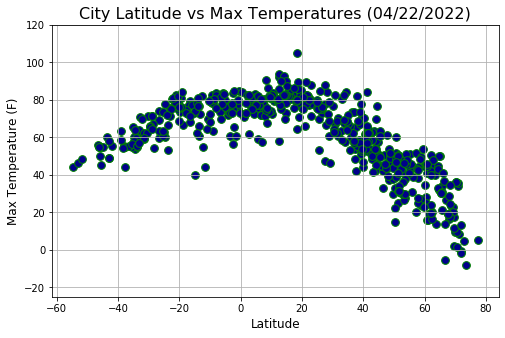

In [94]:
# Create parameters to graph scatter plot - used Matplotlib (plt) but can use Pandas (pd)
plt.rcParams["figure.figsize"] = (8,5)
plt.scatter(x = clean_city_data["Latitude"],y= clean_city_data["Temperature"], 
            s=60, c="darkblue", edgecolors= "green")
plt.title("City Latitude vs Max Temperatures (04/22/2022)", fontsize= 16)
plt.xlabel("Latitude", fontsize =12)
plt.ylabel("Max Temperature (F)", fontsize= 12)
plt.ylim(-25, 120)
plt.grid()

# Export scatterplot as png
plt.savefig("/Users/tanishacooper/code/python-api-challenge/WeatherPy/Scatter_Lat_Temp.png", 
            index= False)

# Show scatter plot
plt.show()

## Latitude vs. Humidity Plot

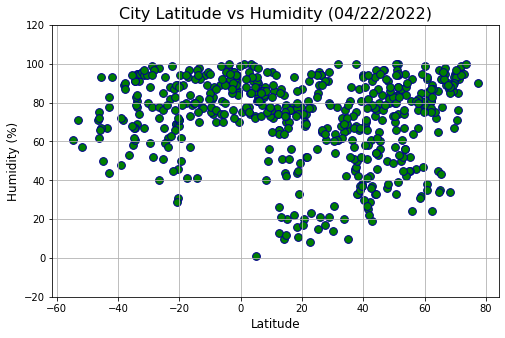

In [95]:
# Create parameters to graph scatter plot - used Matplotlib (plt) but can use Pandas (pd)
plt.rcParams["figure.figsize"] = (8,5)
plt.scatter(x = clean_city_data["Latitude"],y= clean_city_data["Humidity"], 
            s=60, c="green", edgecolors= "darkblue")
plt.title("City Latitude vs Humidity (04/22/2022)", fontsize= 16)
plt.xlabel("Latitude", fontsize =12)
plt.ylabel("Humidity (%)", fontsize= 12)
plt.ylim(-20, 120)
plt.grid()

# Export scatterplot as png
plt.savefig("/Users/tanishacooper/code/python-api-challenge/WeatherPy/Scatter_Lat_Humidity.png", 
            index= False)

# Show scatter plot
plt.show()

## Latitude vs. Cloudiness Plot

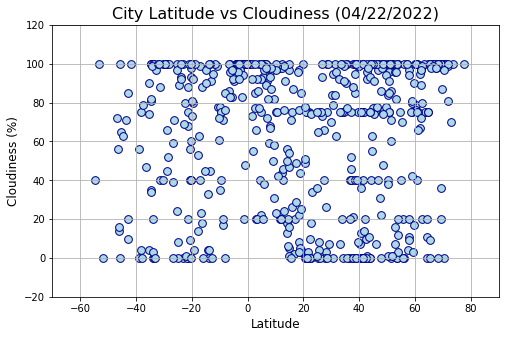

In [101]:
# Create parameters to graph scatter plot - used Matplotlib (plt) but can use Pandas (pd)
plt.rcParams["figure.figsize"] = (8,5)
plt.scatter(x = clean_city_data["Latitude"],y= clean_city_data["Cloudiness"], 
            s=60, c="lightblue", edgecolors= "darkblue")
plt.title("City Latitude vs Cloudiness (04/22/2022)", fontsize= 16)
plt.xlabel("Latitude", fontsize =12)
plt.ylabel("Cloudiness (%)", fontsize= 12)
plt.xlim(-70,90)
plt.ylim(-20, 120)
plt.grid()

# Export scatterplot as png
plt.savefig("/Users/tanishacooper/code/python-api-challenge/WeatherPy/Scatter_Lat_Cloudiness.png", 
            index= False)

# Show scatter plot
plt.show()

## Latitude vs. Wind Speed Plot

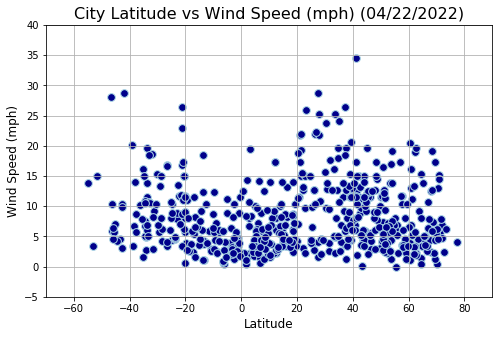

In [105]:
# Create parameters to graph scatter plot - used Matplotlib (plt) but can use Pandas (pd)
plt.rcParams["figure.figsize"] = (8,5)
plt.scatter(x = clean_city_data["Latitude"],y= clean_city_data["Windspeed"], 
            s=60, c="darkblue", edgecolors= "lightblue")
plt.title("City Latitude vs Wind Speed (mph) (04/22/2022)", fontsize= 16)
plt.xlabel("Latitude", fontsize =12)
plt.ylabel("Wind Speed (mph)", fontsize= 12)
plt.xlim(-70,90)
plt.ylim(-5, 40)
plt.grid()

# Export scatterplot as png
plt.savefig("/Users/tanishacooper/code/python-api-challenge/WeatherPy/Scatter_Lat_Windspeed.png", 
            index= False)

# Show scatter plot
plt.show()

## Linear Regression

In [112]:
# Create variables for the Northern and Southern Hemispheres
north_hemisphere = clean_city_data.loc[clean_city_data["Latitude"] >= 0]
#north_hemisphere (384 rows)

south_hemisphere = clean_city_data.loc[clean_city_data["Latitude"] < 0]
#south_hemisphere (173 rows)

,City,Country,Temperature,Humidity,Cloudiness,Windspeed,Latitude,Longitude,Date
1,urumqi,CN,54.55,33,0,4.47,43.8010,87.6005,1650666986
6,sisimiut,GL,26.40,89,100,6.38,66.9395,-53.6735,1650666987
7,oussouye,SN,78.98,66,44,6.42,12.4850,-16.5469,1650667315
11,barrow,US,8.62,92,100,5.75,71.2906,-156.7887,1650667317
12,lasa,IT,50.88,97,97,2.91,46.6166,10.7002,1650667317
...,...,...,...,...,...,...,...,...,...
552,arman,RU,23.02,75,17,3.40,59.7000,150.1667,1650667171
553,jumla,NP,46.24,79,7,4.47,29.2747,82.1838,1650667171
554,kashkhatau,RU,41.56,85,98,0.18,43.3185,43.6080,1650667172
555,vorobyevka,RU,47.01,94,85,5.48,50.6451,40.9245,1650667172


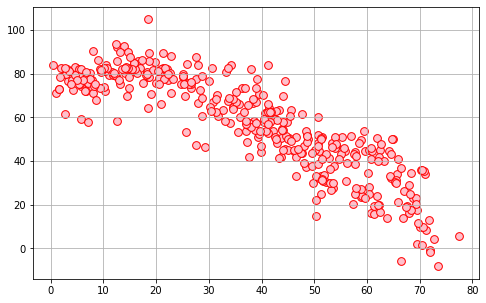

In [114]:
plt.scatter(x = north_hemisphere["Latitude"], y= north_hemisphere["Temperature"], s=60, 
           c= "pink", edgecolors= "red")
plt.grid()